In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import SubsetRandomSampler
import sys
import os


In [4]:
#add the parent directory to the current working directory so that we can access MLP class
repository_root_directory = os.path.dirname(os.getcwd())
rrd = "repository_root_directory:\t"
print(rrd, repository_root_directory)

if repository_root_directory not in sys.path:
    sys.path.append(repository_root_directory)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")



repository_root_directory:	 c:\Users\cengl\Documents\CSC 461\code\csc_461_fp
repository_root_directory:	 added to path


cuda status:  cuda
repository_root_directory:	 c:\Users\cengl\Documents\CSC 461\code\csc_461_fp
repository_root_directory:	 already in path
shape of train:  [250,torch.Size([64, 30]),  torch.Size([64])] shape of validation:  [torch.Size([500, 30]),  torch.Size([500])] shape of test:  [torch.Size([250, 30]),  torch.Size([250])]
Epoch 0, training Loss 129.95222717285156, training Accuracy 0.08364763110876083, validation loss 64.95267486572266, validation accuracy 0.1080000028014183
Epoch 1, training Loss 59.61446160888672, training Accuracy 0.09846443682909012, validation loss 45.4843635559082, validation accuracy 0.08400000631809235
Epoch 2, training Loss 45.4955417175293, training Accuracy 0.13402478396892548, validation loss 45.92337417602539, validation accuracy 0.1080000028014183
Epoch 3, training Loss 36.03316697692871, training Accuracy 0.14857220649719238, validation loss 30.741056442260742, validation accuracy 0.10400000214576721
Epoch 4, training Loss 23.851616546630858, traini

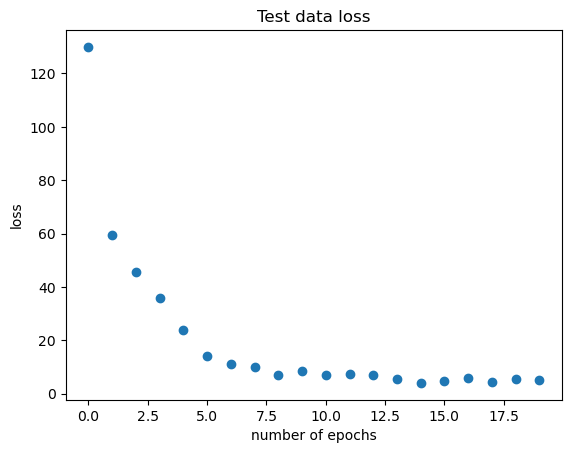

train accuracy:  [tensor(0.0836, device='cuda:0'), tensor(0.0985, device='cuda:0'), tensor(0.1340, device='cuda:0'), tensor(0.1486, device='cuda:0'), tensor(0.1325, device='cuda:0'), tensor(0.1506, device='cuda:0'), tensor(0.1884, device='cuda:0'), tensor(0.1829, device='cuda:0'), tensor(0.1529, device='cuda:0'), tensor(0.2361, device='cuda:0'), tensor(0.1747, device='cuda:0'), tensor(0.1810, device='cuda:0'), tensor(0.2025, device='cuda:0'), tensor(0.2275, device='cuda:0'), tensor(0.2115, device='cuda:0'), tensor(0.1888, device='cuda:0'), tensor(0.1923, device='cuda:0'), tensor(0.2298, device='cuda:0'), tensor(0.1987, device='cuda:0'), tensor(0.2526, device='cuda:0')]


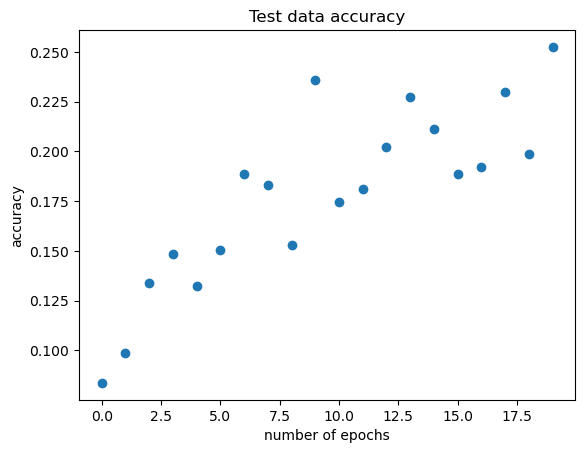

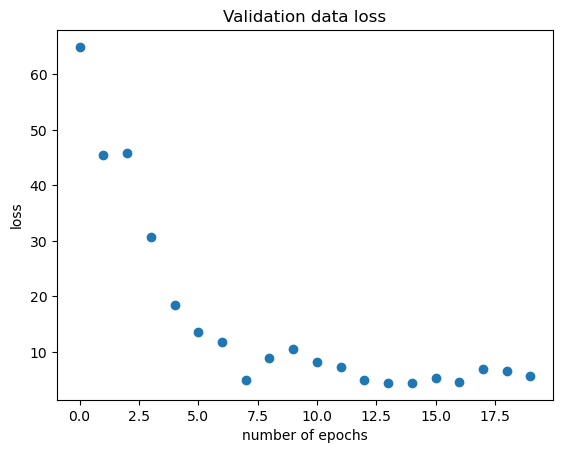

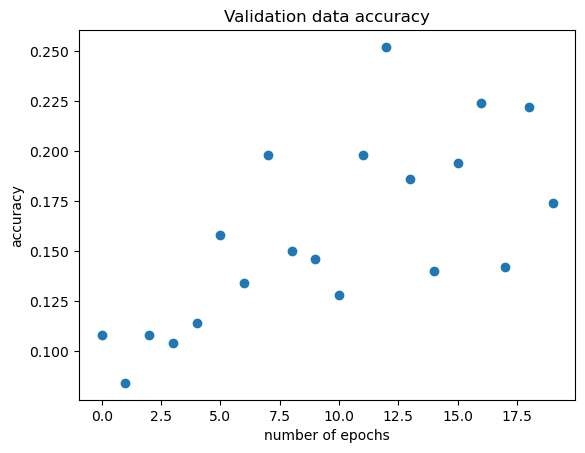

avgLoss:  0.172
avgAccuracy:  5.604939937591553


In [ ]:

#import the class
from mlp import MLP


#check to see if cuda is avalable
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("cuda status: ", device)

#create a configuration dictionary. input size is the number of features in each sample
config = {
    'input_size': 30,
    'output_size': 10,
    'hidden_layers': [256,64],
    'batch_size': 64,
    'n_epochs': 20,
    'learning_rate': 0.001
}

model = MLP(config['input_size'], config['output_size'], config['hidden_layers']).to(device)
#define criterion and an optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])


#trainData, validData, testData =  MLP.load_dataset(model, config['batch_size'])

trainData, validData, testData =  model.load_model_dataset(config['batch_size'])
#trainedData = MLP.train(model, criterion, optimizer, trainData, validData, config['n_epochs'], device)
trainedData = model.train_model(model,criterion, optimizer, trainData, validData, config['n_epochs'], device)
#avgLoss, avgAccuracy = MLP.test(model, criterion, testData, device)

avgLoss, avgAccuracy = model.test_model(model,criterion, testData, device)


#create the scatter plot for the test and validation data
#using the .item() to extract the float from the tensor
datasetTrainedAccuracy = [t.item() for t in trainedData[1]]
datasetValidationAccuracy = [t.item() for t in trainedData[3]]

#test data scatter plot for loss
epochList = list(range(config['n_epochs']))
plt.scatter(epochList, trainedData[0])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("Test data loss")
plt.show()

#test data for scatter plot for accuracy
#epochList = list(range(config['n_epochs']))
plt.scatter(epochList, datasetTrainedAccuracy)
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.title("Test data accuracy")
plt.show()

#Validation data for scatter plot for loss
#epochList = list(range(config['n_epochs']))
plt.scatter(epochList, trainedData[2])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.title("Validation data loss")
plt.show()

#validation data for scatter plot for accuracy
#epochList = list(range(config['n_epochs']))
plt.scatter(epochList, datasetValidationAccuracy)
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.title("Validation data accuracy")
plt.show()

#test loss and accuracy
print("avgLoss: ", avgLoss)
print("avgAccuracy: ", avgAccuracy)

In [ ]:
#save the model for later use
torch.save(model.state_dict(), 'model.pth')